# Part 1 - Self Attention Notebook 
### Python notebook to get some hands-on to understand the computation of self attention scores.
----

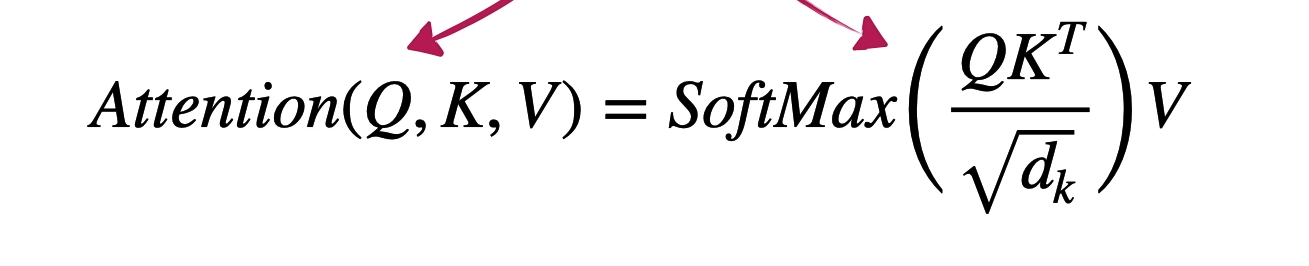

In [1]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

SEED = 42

In [2]:
# SelfAttention class which computes the Attention Scores for a given Token Encodings Matrix (Word Embeddings + positional encodings)
class SelfAttention(nn.Module):
    def __init__(self, d_model, row_dim=0, col_dim=1):

        torch.manual_seed(SEED)
        super().__init__()
        
        self.d_model = d_model
        self.row_dim = row_dim
        self.col_dim = col_dim

        self.W_q = nn.Linear(in_features=d_model, out_features=d_model, bias=False)
        self.W_k = nn.Linear(in_features=d_model, out_features=d_model, bias=False)
        self.W_v = nn.Linear(in_features=d_model, out_features=d_model, bias=False)

    def forward(self, token_encodings):
        """
            param:
                token_encodings: Tensor of shape (num_tokens, embed_dim) - Token Embeddings + Position Encodings

            return:
                attention_scores: Self-Attention Scores for the given token_encodings. The output will be of shape (num_tokens x v.shape[1])
        """ 
        # Here PyTorch will automatically perform token_encodings (num_tokens x embed_dim) @ W_q.T (embed_dim x embed_dim)
        # In our case, this detail doesn't matter much. But in actual transformer architecture, using multi-headed attention W_q weight matrix will be of shape (512 x 64)
        # So 8 attention-heads will give us the final embedding dimension after attention mechanism to be 512 dims
        
        # q, k and v tensors will be of shape (num_tokens X 64) in actual transformer. But in our case it will be (num_tokens x 2[embed_dim])
        q = self.W_q(token_encodings)
        k = self.W_k(token_encodings)
        v = self.W_v(token_encodings)
        
        similarity_score = torch.matmul(q, k.T)
        scaled_similarity_score = similarity_score / k.shape[-1] ** 0.5

        # If there were 20 tokens in the input token_encodings, so technically it would be (20 x embed_dim).
        # Now after applying self-attention, the final attention_probs matrix will be of dim: (20 x 20).
        # If basically gives us the attention_prob (similarity score) of one token against itself and others.
        attention_probs = torch.softmax(scaled_similarity_score, dim=self.col_dim)
        
        attention_scores = attention_probs @ v

        return attention_scores


In [3]:
# encodings_matrix of an input sentence "I am Indian" will have 3 tokens and embed_dim in our case of 2. Just a dummy assumption.
# So we embed these tokens and also add the positional encodings to get a (3 x 2) encoding_matrix for the input sentence
encodings_matrix = torch.tensor([[1.16, 0.23],
                                 [0.57, 1.36],
                                 [4.41, -2.16]
                                 ])

In [4]:
# Instantiate the SelfAttention class
self_attention = SelfAttention(d_model=2, row_dim=0, col_dim=1)

In [5]:
attention_output = self_attention(encodings_matrix)

In [6]:
attention_output.shape

torch.Size([3, 2])

In [7]:
attention_output

tensor([[1.0100, 1.0641],
        [0.2040, 0.7057],
        [3.4989, 2.2427]], grad_fn=<MmBackward0>)

### Self Attention:
<p>
Given a sentence, "The pizza came out of the oven and it tasted good", when we perform self-attention, we use similarities between each word and itself and all other words that come after it and before it to get the attention scores so that we know how much each word attends to other words.
</p>

<p>
This mechanism is used in the Encoder-Only Transformer which will create `Context Aware Embeddings` which has many applications like training light-weight classifiers using these as features for classification, ER etc.
</p>

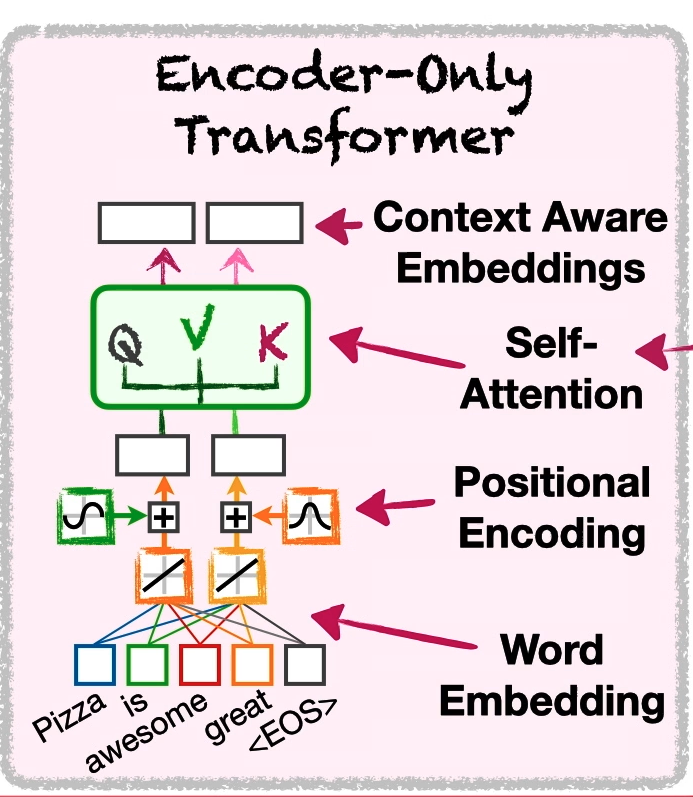

### Masked Self Attention:
<p>In contrast, Masked Self-Attention would only use the similarity of the word `The` and itself and ignore everything that came after it. </p>
<p> This mechanism is used in a Decoder-Ony Transformer which creates Generative Inputs which when fed into a FFNN that generates new tokens. </p>

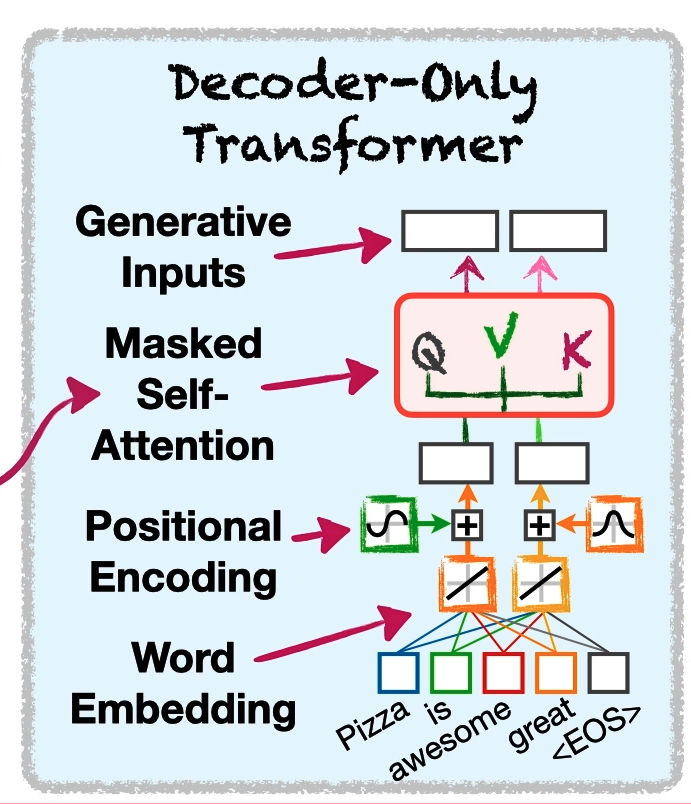